## Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective
To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Importing necessary Packages

In [47]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### QUICK SANITY CHECK: Creating Original Data Set Version to refer back to 

In [48]:
loan = pd.read_csv(
    "https://raw.githubusercontent.com/miricoder/projects/main/Supervised_Learning_Classification/Loan_Modelling.csv"
)

<IPython.core.display.Javascript object>

In [49]:
# Display column and row values using pyton 3's f-string
print(f"There are {loan_data.shape[0]} rows and {loan_data.shape[1]} columns in the original loan_data set.")

# Looking at the 10 random sample rows done using np.random
# Because looking at random values will give you better understaning than head or tail values
np.random.seed(1)
loan.sample(5)


There are 5000 rows and 14 columns in the original loan_data set.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0


<IPython.core.display.Javascript object>

In [50]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [51]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [52]:
loan.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [53]:
loan.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

<IPython.core.display.Javascript object>

In [54]:
# Note: The describe method for numeric columns doesn't list the number of unique values,
#    since this is usually not particularly meaningful for numeric data
loan.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

**Observations -**
* Dataset is properly loaded 
* There're no null or duplicate values present in the original Data Set 
* All Columns Shows be having unique values in them 
* ID column is very unique so it will be dropped during the Data Clean Up Process
* `Online`:  Median is 1, string indicator that customer usage of online facilities 
* `Mortgage`: Median Mortgage is at 0.0, however we see that less than 75% of Value of house mortgage is at 101K with high standard deviation and seems to have outlier in both ends of the tail
* `CCAvg`: Median spending on credit cards per month is at 1.5
* `Income`: Median Annual income of the customer is at 64K 
* `Age`: Median Customer’s age in completed years is 45 with Median `Experience` level at 20 Years and the Median `Family` size of the customer is at 2

###### **Making the second copy of the Loan Data Set for below Alterations to be performed**
* Checking for Unique values in ID column and removing it

In [55]:
# Making second copy
loan_2 = loan.copy()

<IPython.core.display.Javascript object>

In [56]:
loan_2["ID"].nunique()

5000

<IPython.core.display.Javascript object>

In [57]:
loan_2.drop(["ID"], axis=1, inplace=True)  # Dropping the ID column

<IPython.core.display.Javascript object>

# **EDA - Exploratory Data Analysis on PreProcessed Data**
******************************************************************************************

**Reusable Methods**

In [70]:
def hist_box(data, feature, figsize=(10, 5), kde=True, bins=None):
    """
    Boxplot and Histogram combined within the same graph page
    in order to make comparison and analysis more efficient

    data: dataframe
    feature: dataframe column
    figsize: size of the figures (default (10,5))
    kde: whether to show the density curve (values set by user during usage - Boolean)
    bins: number of bins for histogram (default None)"""
    # f2 holds are graph withax_box2 and ax_hist2 params
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [71]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<h2 style="color:Brown">Univariate Analysis</h2>

### `Analyzing Age`

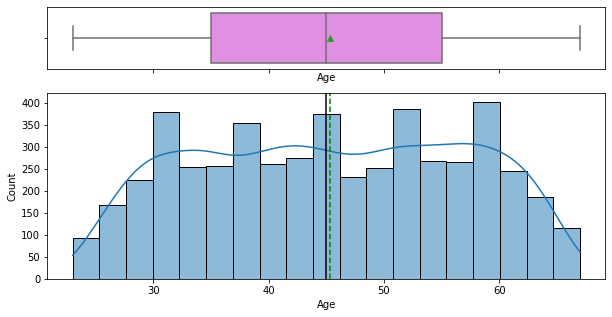

<IPython.core.display.Javascript object>

In [73]:
hist_box(loan_2, "Age")

**Univariate - Observation on Age-**
* No Outliers present, Mean and Median ages are very close

### `Analyzing Experience`

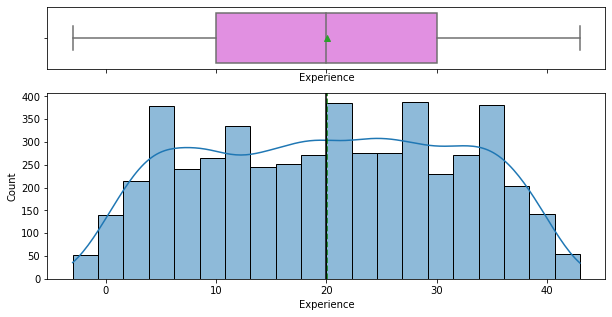

<IPython.core.display.Javascript object>

In [75]:
hist_box(loan_2, "Experience")

**Univariate - Observation on Experience-**
* Median number of professional experience years is 20


### `Analyzing Income`

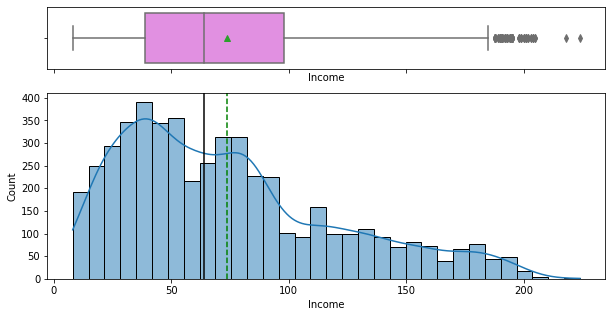

<IPython.core.display.Javascript object>

In [78]:
hist_box(loan_2, "Income")

**Univariate - Observation on Income-**
* Income is right skewed with outliers where mean income is greter than median 
* Less than 50% of our customers have annual income range of approx. 40-60K

In [72]:
loan_2.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

<IPython.core.display.Javascript object>

### `Analyzing ZIPCode`
* It would be better if we had state wise information rather than zipCode 


Most Frequent ZIPCode:  0    94720
dtype: int64


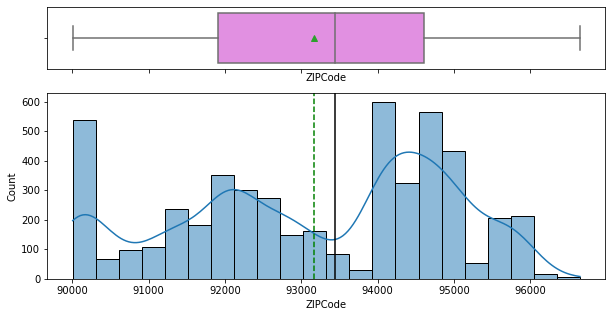

<IPython.core.display.Javascript object>

In [86]:
print("Most Frequent ZIPCode: ", loan_2["ZIPCode"].mode())
hist_box(loan_2, "ZIPCode")

**Univariate - Observation on ZIPCode-**
* Based on the ZipCodes we can see that NewYork and California has the highest amounts of loans 

******************************************************************************************

<h2 style="color:Brown">Bivariate Analysis</h2>

### `Analyzing Age to Personal_Loan`

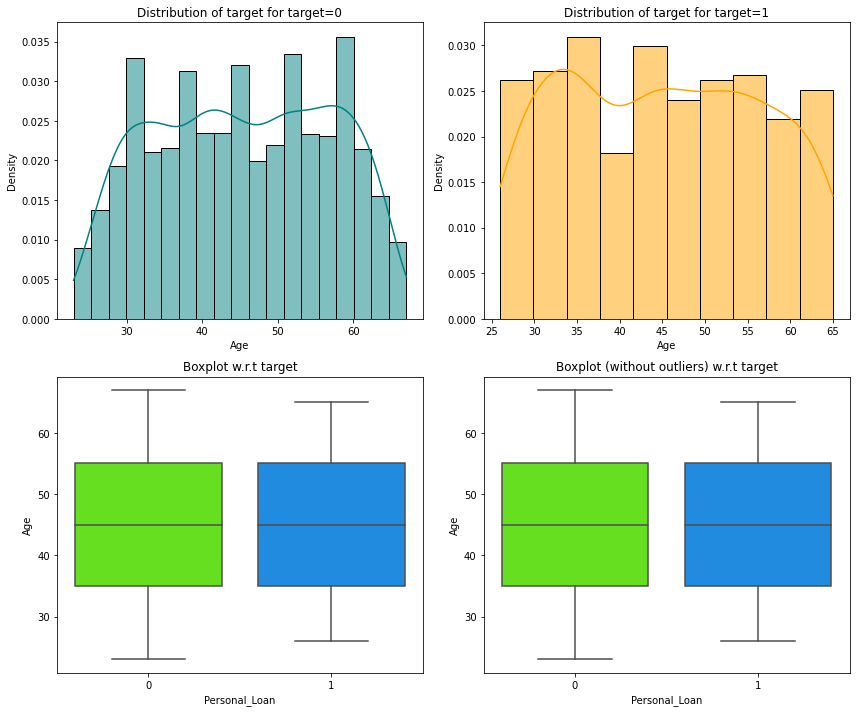

<IPython.core.display.Javascript object>

In [64]:
distribution_plot_wrt_target(loan_2, "Age", "Personal_Loan")

**Bivariate - Observation on Age & Personal_Loan-**
* The ages of Customers during previous Personal_Loan compaign are the same between those to who took it and did not take it 

### `Analyzing Experience to Personal_Loan`

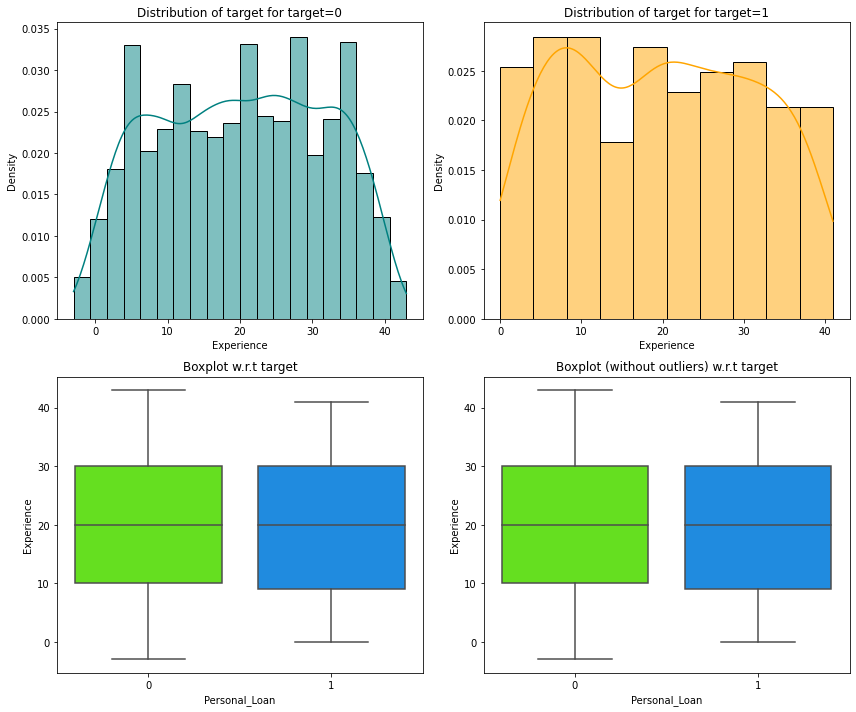

<IPython.core.display.Javascript object>

In [77]:
distribution_plot_wrt_target(loan_2, "Experience", "Personal_Loan")

**Univariate - Observation on Experience-**
* Professionals with Median Experience of 20 years were the same for the Personal_Loan takers and not takers in the previous campaign


### `Analyzing Income to Personal_Loan`

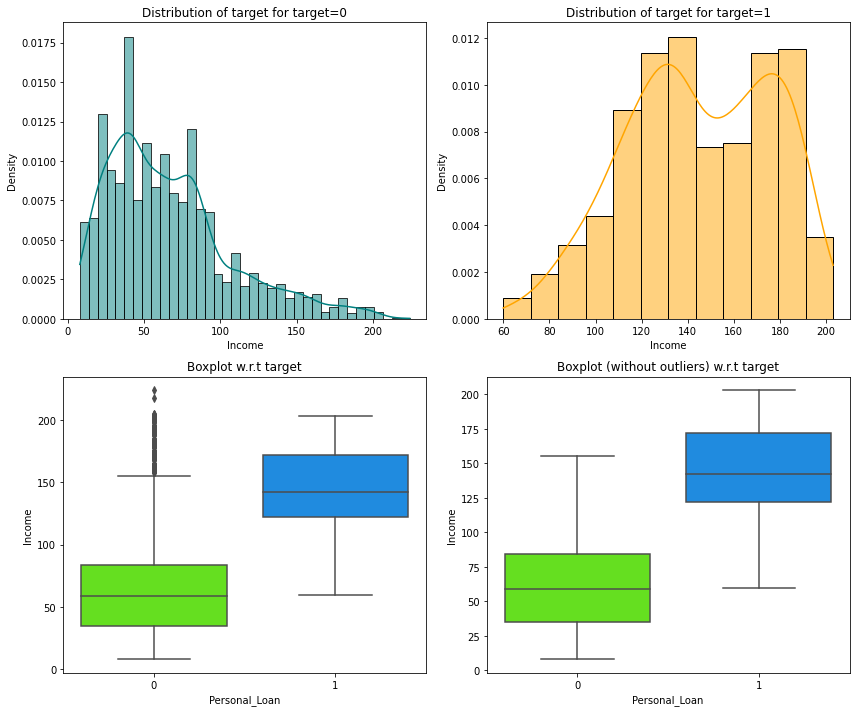

<IPython.core.display.Javascript object>

In [87]:
distribution_plot_wrt_target(loan_2, "Income", "Personal_Loan")

**Univariate - Observation on Income-**
* As observed previously and now, there were more people who did not take the personal_loan in the last campaign than those who did 
* Out of all the Personal_Loan takers in the last campaign, customers with median Income of 55K annually took less loans in the last campaign where as customers with median income at approx. 145K annual took more loans

### `Analyzing ZIPCode to Personal_Loan`

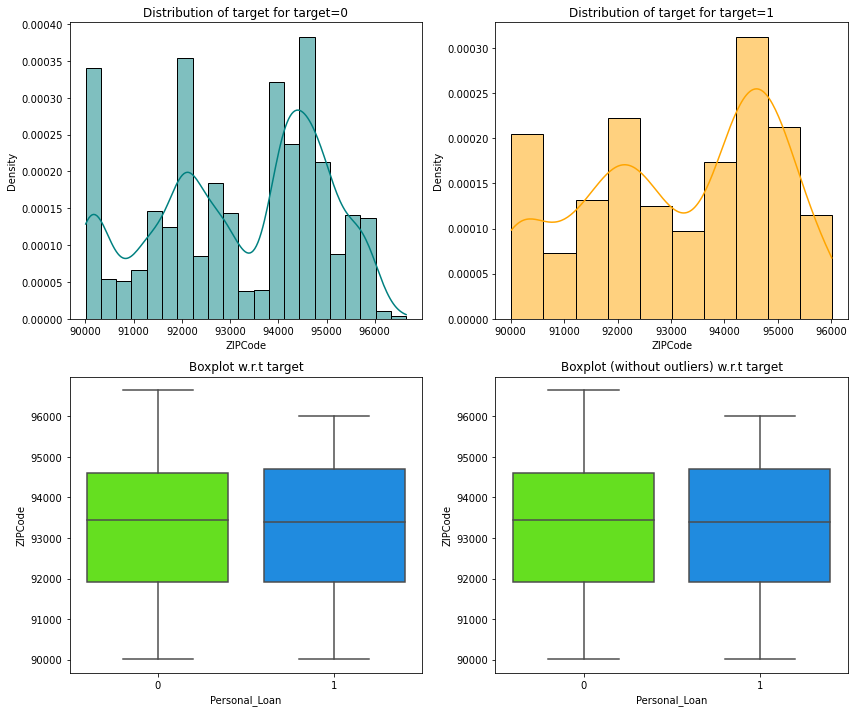

<IPython.core.display.Javascript object>

In [89]:
distribution_plot_wrt_target(loan_2, "ZIPCode", "Personal_Loan")

**Univariate - Observation on ZipCode-**
* Less than 75% of Personal_Loan takers in previous campaign resided in ZipCodes located in NY and CA

<h2 style="color:Brown">Base Model - loan_model_1 with model1_tree</h2>